### 提示
血糖正常值是指人空腹的时候血糖值在3.9～6.1毫摩尔/升

### 要求

- 表示出血糖与年龄的关系
- 计算数据表中各特征与血糖的相关性系数，并用图形展示
- 数据表中各特征之间的相关性
- 选取一个特征展示其对于血糖的直接影响关系
- 预测血糖数值并给出性能评价 （选做）
 

PPT讲解 10分钟   严格控制时间。 PPT文档及word说明文档10月19日BB系统提交。Word不少于1页，格式规范，图文并茂。Word首页标明组长及分工百分比。

# 表示出血糖与年龄的关系

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 数据读取
dataTest = pd.read_csv("bloodsugar_test.csv" ,encoding='gbk')
dataTrain = pd.read_csv("bloodsugar_train.csv" ,encoding='gbk')

dataTest.head()

,id,性别,年龄,体检日期,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,...,红细胞体积分布宽度,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%
0,5733,男,54,10/10/2017,23.85,26.69,116.08,34.36,82.75,46.03,...,12.3,241.0,10.8,12.8,0.26,58.4,33.2,7.5,0.6,0.3
1,5734,男,50,10/10/2017,29.75,34.98,90.07,111.43,71.90,44.09,...,12.0,242.0,11.5,14.6,0.28,59.3,29.3,7.7,3.2,0.5
2,5735,男,27,10/10/2017,NaN,NaN,NaN,NaN,NaN,NaN,...,12.1,398.0,8.9,9.9,0.35,50.2,40.1,7.9,1.2,0.6
3,5736,女,53,10/10/2017,17.98,16.63,95.95,23.41,78.16,45.44,...,12.6,247.0,11.6,13.9,0.29,53.7,38.0,7.2,0.7,0.4
4,5739,女,43,10/10/2017,19.12,19.80,76.97,15.70,80.76,46.90,...,12.2,335.0,10.4,11.9,0.35,52.0,39.4,8.0,0.3,0.3


In [7]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   性别           1000 non-null   object 
 2   年龄           1000 non-null   int64  
 3   体检日期         1000 non-null   object 
 4   *天门冬氨酸氨基转换酶  815 non-null    float64
 5   *丙氨酸氨基转换酶    815 non-null    float64
 6   *碱性磷酸酶       815 non-null    float64
 7   *r-谷氨酰基转换酶   815 non-null    float64
 8   *总蛋白         815 non-null    float64
 9   白蛋白          815 non-null    float64
 10  *球蛋白         815 non-null    float64
 11  白球比例         815 non-null    float64
 12  甘油三酯         824 non-null    float64
 13  总胆固醇         824 non-null    float64
 14  高密度脂蛋白胆固醇    824 non-null    float64
 15  低密度脂蛋白胆固醇    824 non-null    float64
 16  尿素           806 non-null    float64
 17  肌酐           806 non-null    float64
 18  尿酸           806 non-null    float64
 19  乙肝表面抗原 

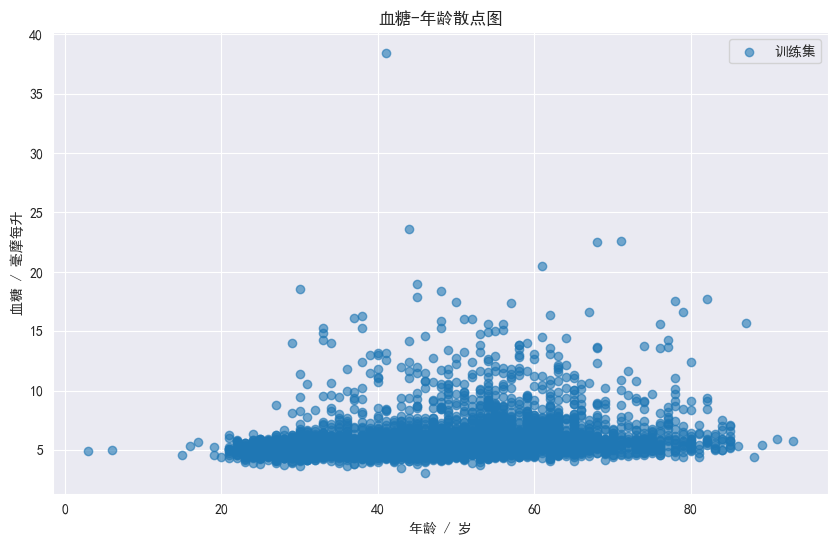

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline


plt.rcParams['font.family']= "SimHei" # 指定字体
plt.rcParams['axes.unicode_minus']=False # 正确显示负号，防止变成方框

# 数据读取
dataTrain = pd.read_csv("bloodsugar_train.csv",encoding='gbk')

# 绘制散点图或线图
plt.figure(figsize=(10, 6))  # 设置图形大小

# 使用散点图表示
plt.scatter(dataTrain['年龄'], dataTrain['血糖'], label='训练集', alpha=0.6)  # alpha用于设置点的透明度
#plt.scatter(dataTest['年龄'], dataTest['血糖'], label='测试集', alpha=0.5)

plt.xlabel('年龄 / 岁')  # 设置X轴标签
plt.ylabel('血糖 / 毫摩每升')  # 设置Y轴标签
plt.title('血糖-年龄散点图')  # 设置标题
plt.legend()  # 显示图例
plt.grid(True)  # 添加网格线

plt.show()  # 显示图形

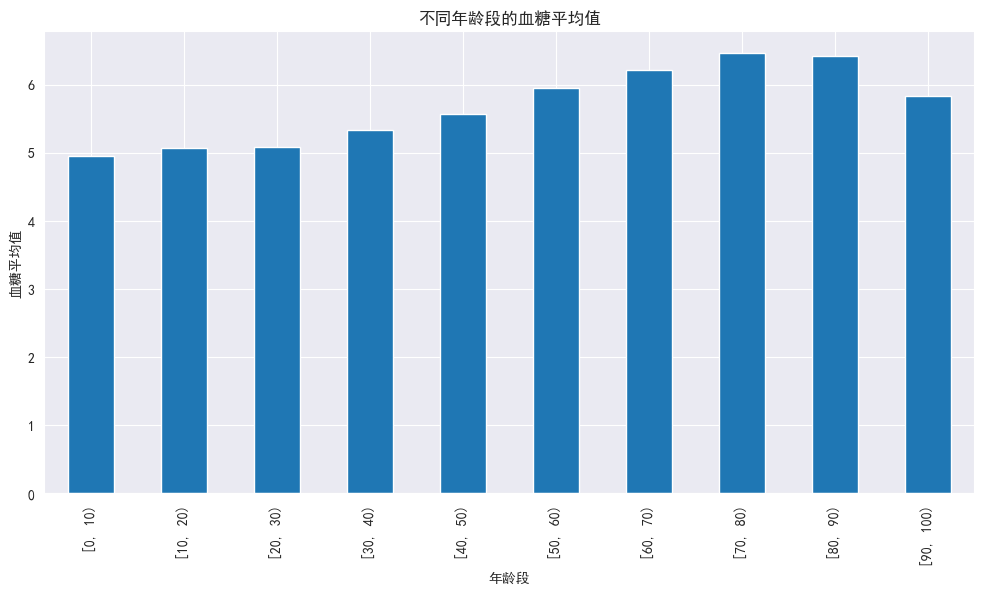

In [9]:
plt.rcParams['font.family']= "SimHei" # 指定字体
plt.rcParams['axes.unicode_minus']=False # 正确显示负号，防止变成方框

# 创建新的列表示每个样本所在的年龄段
dataTrain['年龄段'] = pd.cut(dataTrain['年龄'], bins=range(0, 101, 10), right=False)

# 根据年龄段分组，计算每个年龄段的血糖统计信息
age_groups = dataTrain.groupby('年龄段')['血糖'].describe()

# 柱状图
plt.figure(figsize=(12, 6))
age_groups['mean'].plot(kind='bar')
plt.title('不同年龄段的血糖平均值')
plt.xlabel('年龄段')
plt.ylabel('血糖平均值')
plt.show()

# 计算数据表中各特征与血糖的相关性系数，并用图形展示

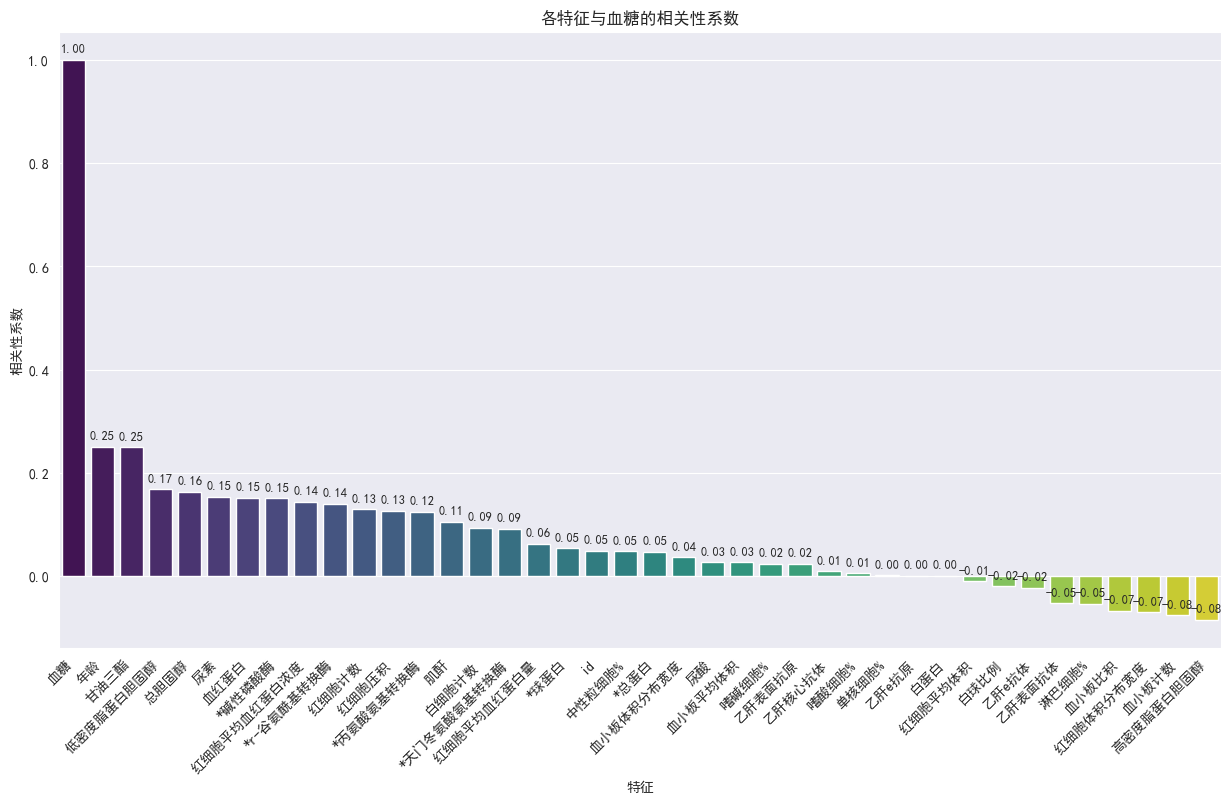

In [10]:
plt.rcParams['font.family']= "SimHei" # 指定字体
plt.rcParams['axes.unicode_minus']=False # 正确显示负号，防止变成方框

# 计算各特征与血糖的相关性系数
correlation_matrix = dataTrain.corr()
correlation_with_target = correlation_matrix['血糖'].sort_values(ascending=False)

# 可视化相关性
plt.figure(figsize=(15, 8))
barplot = sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')


# 在条形图上标记相关性系数的值
for i, value in enumerate(correlation_with_target.values):
    barplot.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.title('各特征与血糖的相关性系数')
plt.xlabel('特征')
plt.ylabel('相关性系数')
plt.xticks(rotation=45, ha='right')  # 使特征名字斜着显示，防止重叠
plt.show()

高密度脂蛋白胆固醇     -0.084771
血小板计数         -0.076223
红细胞体积分布宽度     -0.070134
血小板比积         -0.066777
淋巴细胞%         -0.053933
乙肝表面抗体        -0.052420
乙肝e抗体         -0.022560
白球比例          -0.020111
红细胞平均体积       -0.009815
白蛋白            0.000252
乙肝e抗原          0.000895
单核细胞%          0.001301
嗜酸细胞%          0.005460
乙肝核心抗体         0.009570
乙肝表面抗原         0.023518
嗜碱细胞%          0.023881
血小板平均体积        0.026312
尿酸             0.027109
血小板体积分布宽度      0.036732
*总蛋白           0.047471
中性粒细胞%         0.047878
id             0.049410
*球蛋白           0.053508
红细胞平均血红蛋白量     0.062811
*天门冬氨酸氨基转换酶    0.091724
白细胞计数          0.093266
肌酐             0.105233
*丙氨酸氨基转换酶      0.124791
红细胞压积          0.126097
红细胞计数          0.129056
*r-谷氨酰基转换酶     0.140024
红细胞平均血红蛋白浓度    0.144198
*碱性磷酸酶         0.151119
血红蛋白           0.152096
尿素             0.154036
总胆固醇           0.163226
低密度脂蛋白胆固醇      0.167802
甘油三酯           0.249543
年龄             0.250452
血糖             1.000000
Name: 血糖, dtype: float64


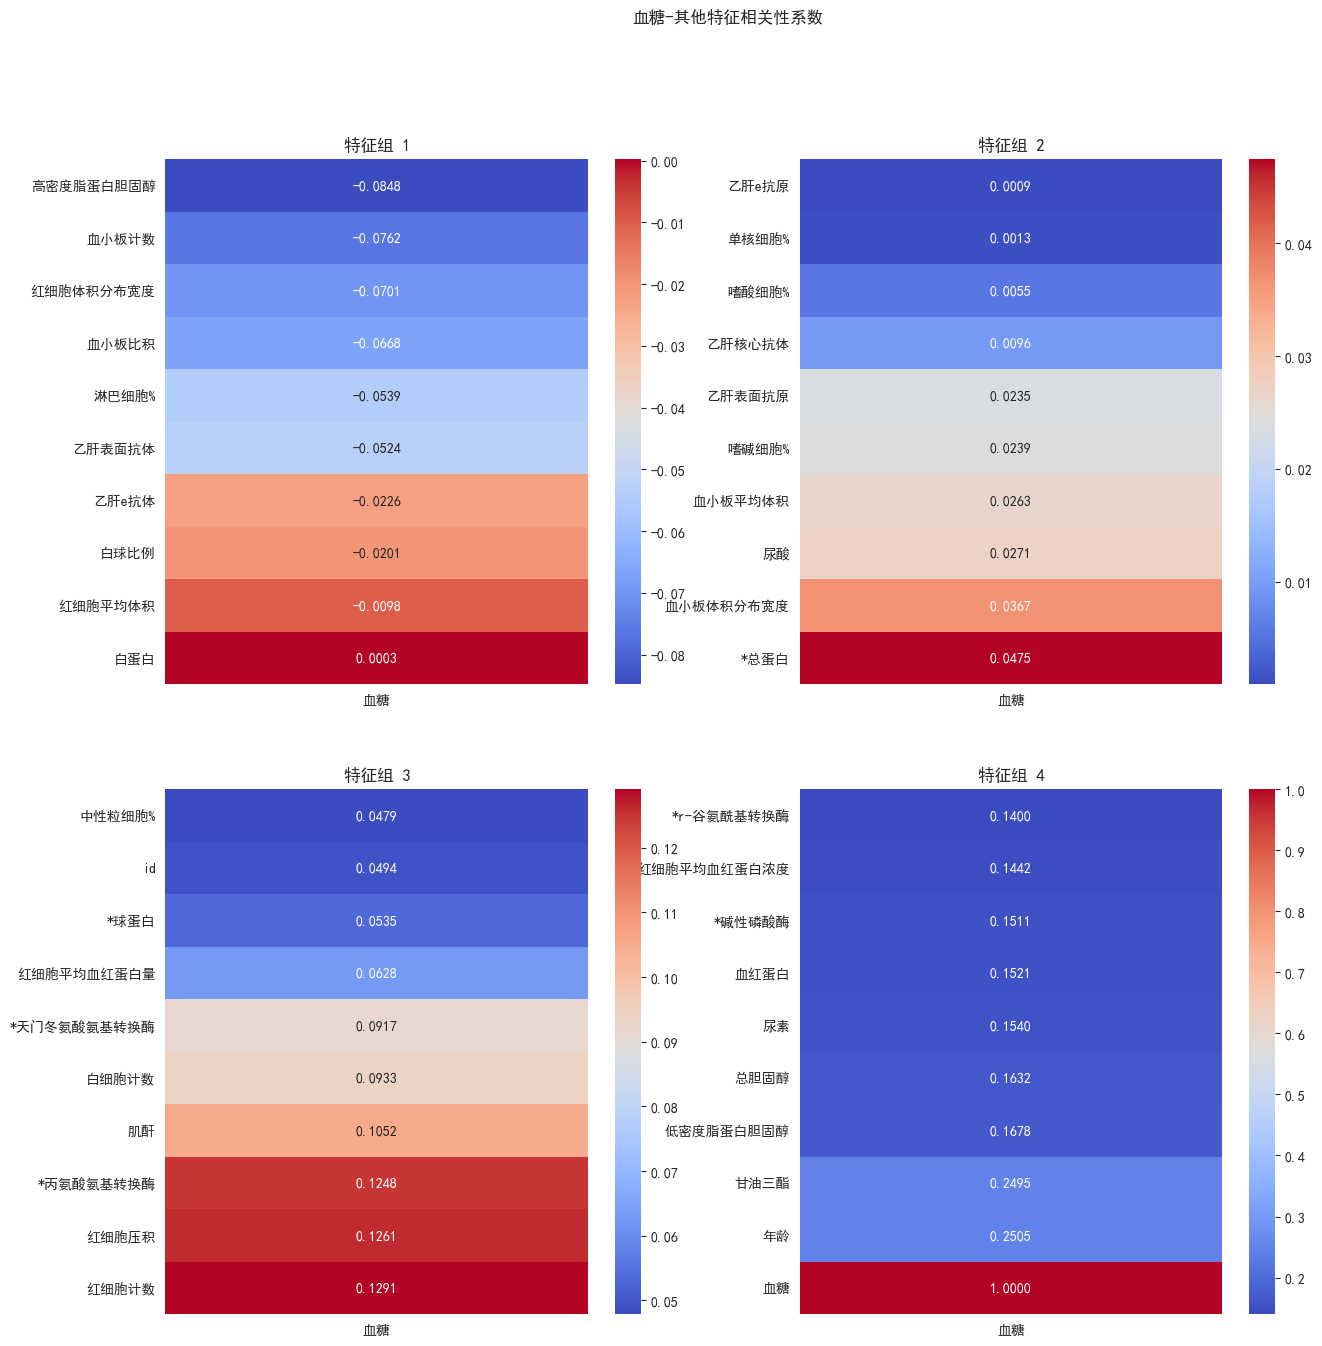

In [13]:
plt.rcParams['font.family']= "SimHei" # 指定字体
plt.rcParams['axes.unicode_minus']=False # 正确显示负号，防止变成方框

# 计算相关性系数矩阵
correlation_matrix = dataTrain.corr()

# 选择血糖与其他特征的相关性系数
blood_sugar_correlation = correlation_matrix['血糖']

#按相关性进行排序
blood_sugar_correlation = blood_sugar_correlation.sort_values()

# 输出血糖与其他特征的相关性系数
print(blood_sugar_correlation)

# 将40个特征分成四组
feature_groups = [blood_sugar_correlation.index[i:i + 10] for i in range(0, len(blood_sugar_correlation.index), 10)]

# 创建包含四个子图的图形
fig, axes = plt.subplots(2, 2, figsize=(15,15), sharex=False)

# 绘制子图
for i in range(2):
    for j in range(2):
        sns.heatmap(correlation_matrix.loc[feature_groups[i * 2 + j], ['血糖']],
                    annot=True, cmap='coolwarm', fmt=".4f", ax=axes[i, j])
        axes[i, j].set_title(f'特征组 {i * 2 + j + 1}')

plt.suptitle('血糖-其他特征相关性系数')
plt.show()

# 数据表中各特征之间的相关性

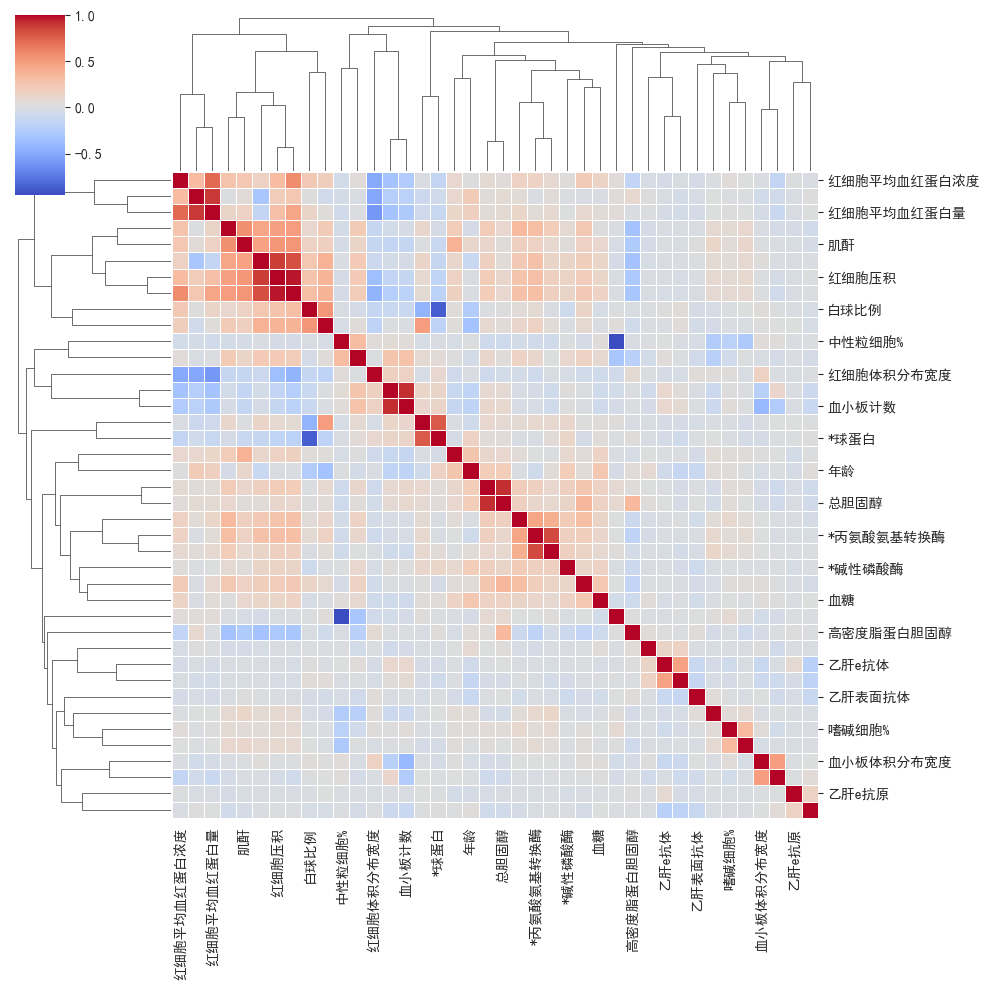

In [14]:
# 计算特征之间的相关性矩阵
correlation_matrix = dataTrain.corr()

# 对相关性矩阵进行层次聚类并重新排列特征的顺序
clustered_corr_matrix = sns.clustermap(correlation_matrix, cmap='coolwarm', linewidths=.5)

# 显示图形
plt.show()

 # 使用t-检验验证甘油三酯对血糖的影响是否显著

In [34]:
import pandas as pd
from scipy import stats

# 数据读取
dataTrain = pd.read_csv("bloodsugar_train.csv", encoding='gbk')

# 选择特征（甘油三酯）和目标（血糖）
triglycerides = dataTrain['甘油三酯']
blood_sugar = dataTrain['血糖']

# 使用均值填充缺失值
mean_triglycerides = dataTrain['甘油三酯'].mean()
dataTrain['甘油三酯'].fillna(mean_triglycerides, inplace=True)

# 按不同血糖水平拆分数据
low_blood_sugar = triglycerides[blood_sugar < 4.0]  # 举例，根据实际情况设置阈值
high_blood_sugar = triglycerides[blood_sugar >= 4.0]

# 执行 t-检验
t_statistic, p_value = stats.ttest_ind(low_blood_sugar, high_blood_sugar)

# 打印检验结果
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 判断显著性
alpha = 0.05  # 通常选择显著性水平为0.05
if p_value < alpha:
    print("拒绝零假设：甘油三酯的平均值在不同血糖水平下存在显著差异。")
else:
    print("未拒绝零假设：甘油三酯的平均值在不同血糖水平下没有显著差异。")


t-statistic: -0.5585455937371253
p-value: 0.5764907136329198
未拒绝零假设：甘油三酯的平均值在不同血糖水平下没有显著差异。


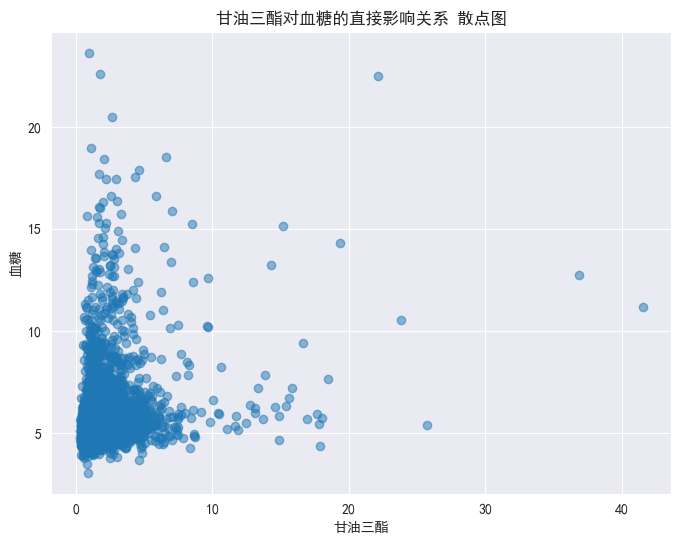

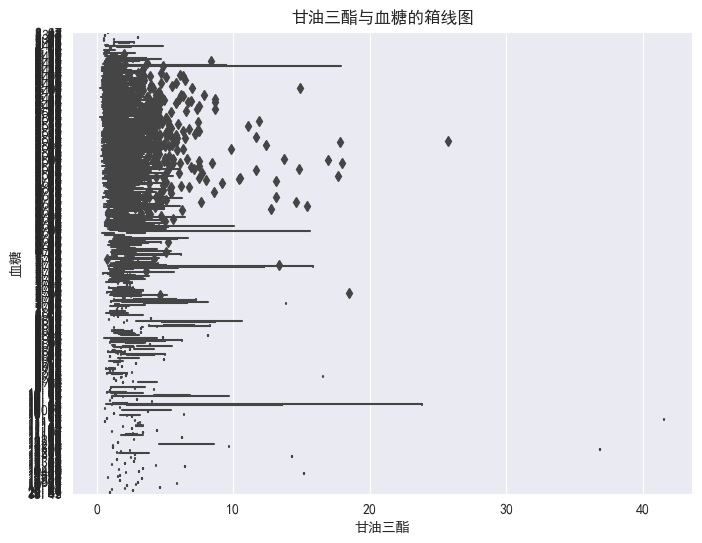

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 数据读取
dataTrain = pd.read_csv("bloodsugar_train.csv", encoding='gbk')

# 选择特征（甘油三酯）和目标（血糖）
triglycerides = dataTrain['甘油三酯']
blood_sugar = dataTrain['血糖']

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(triglycerides, blood_sugar, alpha=0.5)
plt.xlabel('甘油三酯')
plt.ylabel('血糖')
plt.title('甘油三酯对血糖的直接影响关系 散点图')
plt.show()


# 创建箱线图(?)
plt.figure(figsize=(8, 6))
sns.boxplot(x=triglycerides, y=blood_sugar, orient='h')
plt.xlabel('甘油三酯')
plt.ylabel('血糖')
plt.title('甘油三酯与血糖的箱线图')
plt.show()